![my_picture](https://www.fatalerrors.org/images/blog/c6b544ae87e97d71cb450e434a8818a6.jpg)

- apple width=6cm
- apple length=6cm
- banana width=4cm
- banana length=8cm
- watermelon width=15cm
- watermelon length=25cm

assume:
apple : 0

banana: 1

watermelon: 2

In [140]:
import numpy as np
import matplotlib.pyplot as plt

In [141]:
n=100
apple_width=np.random.normal(6,1,n)
apple_length=np.random.normal(6,1,n)
banana_width=np.random.normal(4,1,n)
banana_length=np.random.normal(8,1,n)
watermelon_width=np.random.normal(15,1,n)
watermelon_length=np.random.normal(25,1,n)

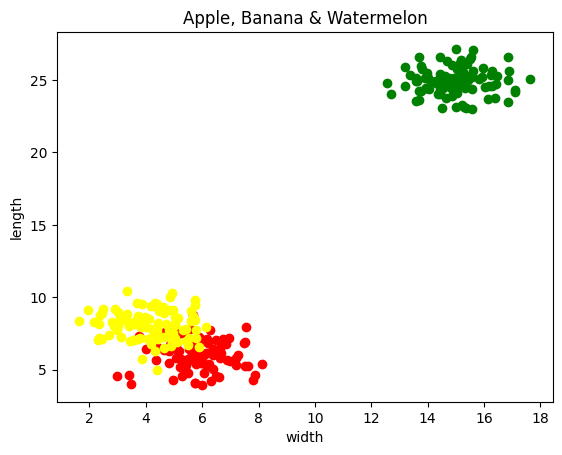

In [142]:
plt.scatter(apple_width,apple_length, color="red")
plt.scatter(banana_width,banana_length, color="yellow")
plt.scatter(watermelon_width,watermelon_length, color="green")

plt.title("Apple, Banana & Watermelon")
plt.xlabel("width")
plt.ylabel("length")
plt.show()

KNN: K Nearest Neighbors

In [143]:
width = np.concatenate((apple_width,banana_width,watermelon_width))
length= np.concatenate((apple_length,banana_length,watermelon_length))
X_train= np.array([width,length]).T
X_train.shape
# X_train

(300, 2)

In [144]:
Y_apples=np.zeros(n,dtype='int')
Y_bananas=np.ones(n,dtype='int')
Y_watermelon=2*np.ones(n,dtype='int')
Y_train=np.concatenate((Y_apples,Y_bananas,Y_watermelon))
Y_train

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

define distance of two points

In [145]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1-x2)**2))

In [146]:
new_fruit=np.array([10,10])
distances=[]
for i in X_train:
    d=euclidean_distance(new_fruit,i)
    distances.append(d)

distances

[6.482654814670014,
 6.067350151010024,
 4.022520437198838,
 3.957172956248873,
 5.567341927622298,
 6.238570968752723,
 4.357662477402206,
 3.201832816689462,
 5.296298490726921,
 6.053794793153331,
 6.117839629003754,
 6.137506913614442,
 6.116450162725137,
 5.778962235073533,
 5.348611914396933,
 5.779159338152676,
 5.291738667462136,
 5.995328036859288,
 5.312146646968773,
 5.857254258443811,
 6.090690943271761,
 7.269647716595557,
 5.365133944717303,
 6.473713043781054,
 6.491079209241402,
 5.2989863766644465,
 6.919599613907519,
 6.546926186781056,
 5.834147625614781,
 6.560492622465043,
 5.365382759202317,
 8.859290860912395,
 4.567404343046318,
 5.1051402356022155,
 4.82644903989961,
 5.77238226718245,
 6.19115453341425,
 7.099270675998086,
 6.768931041908573,
 4.960765168555164,
 5.938984694114389,
 5.546791951020631,
 6.394244463153544,
 8.84187057331265,
 6.164708778502171,
 5.463705541883329,
 5.328634970640342,
 6.077873788530826,
 6.377503247138502,
 7.006704093411344,
 5

In [147]:
k=7
sort_distances=np.sort(distances)
sort_distances

array([ 3.20183282,  3.95717296,  4.02252044,  4.15285596,  4.24362431,
        4.2742049 ,  4.34206904,  4.35766248,  4.37379361,  4.39634074,
        4.48831748,  4.49944818,  4.51203074,  4.51409834,  4.55550565,
        4.56740434,  4.69679347,  4.73864946,  4.77345564,  4.81625612,
        4.82644904,  4.92202611,  4.93215007,  4.94784418,  4.96076517,
        4.99968601,  5.00711382,  5.05433348,  5.06290475,  5.07810676,
        5.08210875,  5.08596266,  5.09719589,  5.10514024,  5.12213886,
        5.1376458 ,  5.13927005,  5.19825243,  5.20053299,  5.2632303 ,
        5.26997865,  5.27044184,  5.27076313,  5.27849144,  5.29173867,
        5.29629849,  5.29898638,  5.30605076,  5.31214665,  5.32489739,
        5.32863497,  5.34861191,  5.35188766,  5.35353514,  5.36513394,
        5.36538276,  5.36712039,  5.38631909,  5.4152381 ,  5.44594655,
        5.46370554,  5.47733254,  5.48097181,  5.50727514,  5.54679195,
        5.56734193,  5.57015933,  5.60418629,  5.60443193,  5.61

In [148]:
nearest_neighbors=np.argsort(distances)[0:k]
nearest_neighbors

array([  7,   3,   2,  70, 167, 180,  95], dtype=int64)

In [149]:
Y_train[nearest_neighbors]

array([0, 0, 0, 0, 1, 1, 0])

In [150]:
result=np.bincount(Y_train[nearest_neighbors])
result

array([5, 2], dtype=int64)

In [151]:
# np.max(result)
if np.argmax(result)==0:
    print("🍎")
elif np.argmax(result)==1:
    print("🍌")
elif np.argmax(result)==2:
    print("🍉")

🍎
